In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import palettable

In [3]:
import verdict

# Parameters

In [4]:
sample_i = 0

In [5]:
modeling_group = 'sameer_charlton'

# Analysis

## Load Data

In [6]:
observers_data = verdict.Dict.from_hdf5( './data/synthetic_data/sample{}/observers_file.h5'.format( sample_i ) )

In [7]:
actual = verdict.Dict.from_hdf5( './data/synthetic_data/sample{}/theorists_file.h5'.format( sample_i ) )

In [8]:
provided = verdict.Dict.from_hdf5( './data/synthetic_data_samples/sample0.h5' )

In [9]:
modeled_raw = verdict.Dict.from_hdf5( './data/modeling_results/{}/sample{}/sample{}.hdf5'.format( modeling_group, sample_i, sample_i ) )

In [10]:
derived = pd.read_csv( './data/modeling_results/sameer_charlton/sample{}/derived.txt'.format( sample_i ), sep='\t', index_col=0 )

In [11]:
modeled = {
    'metallicity': np.array([ modeled_raw[str(i+1)][0] for i in range( actual['metallicity'].size ) ]),
    'emetallicity': np.array([ modeled_raw[str(i+1)][1] for i in range( actual['metallicity'].size ) ]),
    'length': derived.values[:,0],
    'H_column': derived.values[:,1],
    'temperature': derived.values[:,2],
    'H_density': derived.values[:,3],
}

In [12]:
phase_diagram = verdict.Dict.from_hdf5( './data/m12i_phase_diagram_z0.25.h5' )

### Address Possible Scrambling of Sightline Inds

#### Best case match closest metallicities

In [13]:
model_sort_inds = np.argsort( modeled['metallicity'] )
actual_sort_inds = np.argsort( actual['metallicity'] )

#### Use Sameer's columns to assess mixup

In [14]:
columns = pd.read_csv( './data/modeling_results/sameer_charlton/sample{}/columns.txt'.format( sample_i ), sep='\t', index_col=0 )

In [15]:
columns.loc['HI']

1     (16.119, 0.024)
2      (16.79, 0.036)
3     (16.228, 0.119)
4     (16.116, 0.021)
5     (15.042, 0.083)
6     (15.847, 0.085)
7     (16.152, 0.112)
8     (16.002, 0.016)
9     (15.083, 0.036)
10    (15.246, 0.019)
Name: HI, dtype: object

In [16]:
provided['H I']['logN']

array([16.119, 16.79 , 16.228, 16.116, 15.042, 15.847, 16.152, 16.002,
       15.083, 15.246])

In [17]:
np.log10( actual['H I'] )

array([16.11584568, 16.78074119, 16.30781422, 16.11727303, 15.02511568,
       15.77885151, 16.04175715, 15.98874601, 15.11761043, 15.23535708])

It doesn't look like there was a mixup...

# Results

## 1-to-1 comparison

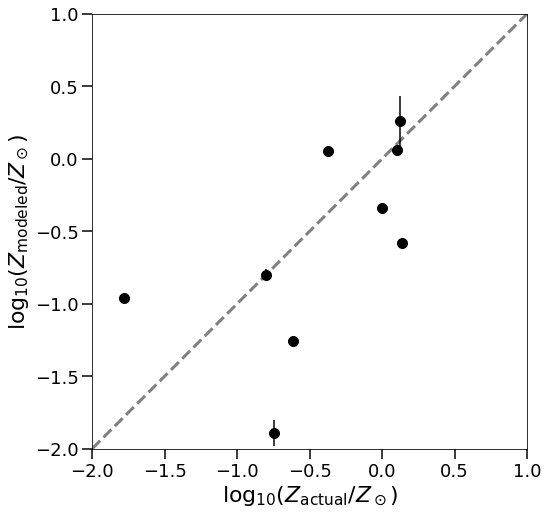

In [18]:
fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

ax.errorbar(
    np.log10( actual['metallicity'] ),
    modeled['metallicity'],
    yerr = modeled['emetallicity'],
    marker = 'o',
    markersize = 10,
    color = 'k',
    linestyle = 'none',
)

# ax.errorbar(
#     np.log10( actual['metallicity'] )[actual_sort_inds],
#     modeled['metallicity'][model_sort_inds],
#     yerr = modeled['emetallicity'][model_sort_inds],
#     marker = 'o',
#     markersize = 10,
#     color = '0.5',
#     linestyle = 'none',
#     zorder = -5,
# )

ax.plot(
    [ -2, 1 ],
    [ -2, 1 ],
    color = '0.5',
    linestyle = '--',
    linewidth = 3,
    zorder = -10,
)

ax.tick_params( length=10, width=1.5, labelsize=18 )

ax.set_xlabel( r'$\log_{10}( Z_{\rm actual}/Z_\odot )$', fontsize=22, )
ax.set_ylabel( r'$\log_{10}( Z_{\rm modeled}/Z_\odot )$', fontsize=22, )

ax.set_xlim( -2, 1 )
ax.set_ylim( -2, 1 )

ax.set_aspect( 'equal' )

plt.savefig( './figures/sample0/Z_modeled_vs_actual.pdf', bbox_inches='tight' )

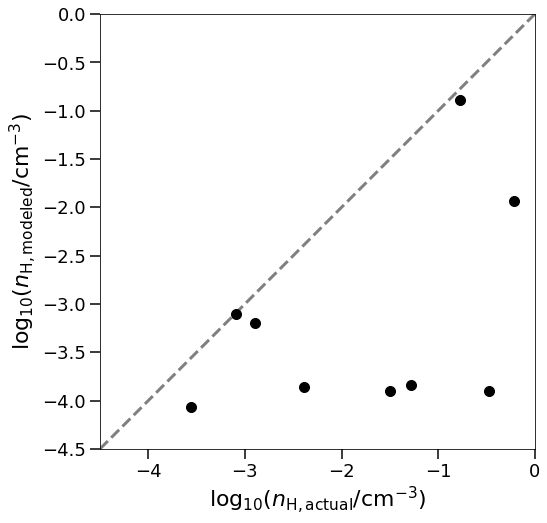

In [19]:
fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

ax.scatter(
    np.log10( actual['H_density'] ),
    modeled['H_density'],
    marker = 'o',
    s = 100,
    color = 'k',
)

# ax.errorbar(
#     np.log10( actual['metallicity'] )[actual_sort_inds],
#     modeled['metallicity'][model_sort_inds],
#     yerr = modeled['emetallicity'][model_sort_inds],
#     marker = 'o',
#     markersize = 10,
#     color = '0.5',
#     linestyle = 'none',
#     zorder = -5,
# )

bounds = [ -4.5, 0 ]

ax.plot(
    bounds,
    bounds,
    color = '0.5',
    linestyle = '--',
    linewidth = 3,
    zorder = -10,
)

ax.tick_params( length=10, width=1.5, labelsize=18 )

ax.set_xlabel( r'$\log_{10}( n_{\rm H,actual}/{\rm cm^{-3}} )$', fontsize=22, )
ax.set_ylabel( r'$\log_{10}( n_{\rm H,modeled}/{\rm cm^{-3}} )$', fontsize=22, )

ax.set_xlim( bounds )
ax.set_ylim( bounds )

ax.set_aspect( 'equal' )

plt.savefig( './figures/sample0/nH_modeled_vs_actual.pdf', bbox_inches='tight' )

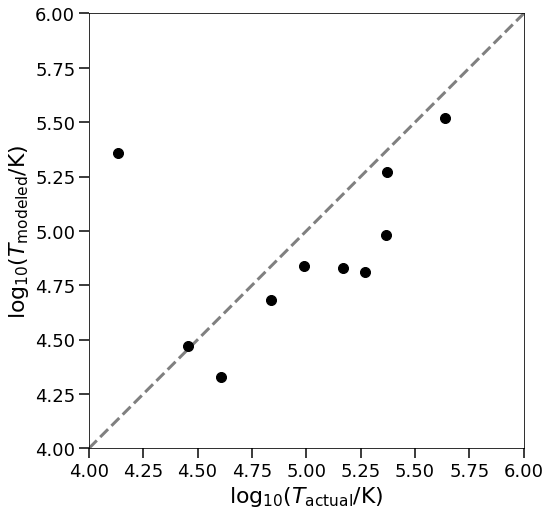

In [20]:
fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

ax.scatter(
    np.log10( actual['temperature'] ),
    modeled['temperature'],
    marker = 'o',
    s = 100,
    color = 'k',
)

# ax.errorbar(
#     np.log10( actual['metallicity'] )[actual_sort_inds],
#     modeled['metallicity'][model_sort_inds],
#     yerr = modeled['emetallicity'][model_sort_inds],
#     marker = 'o',
#     markersize = 10,
#     color = '0.5',
#     linestyle = 'none',
#     zorder = -5,
# )

bounds = [ 4, 6 ]

ax.plot(
    bounds,
    bounds,
    color = '0.5',
    linestyle = '--',
    linewidth = 3,
    zorder = -10,
)

ax.tick_params( length=10, width=1.5, labelsize=18 )

ax.set_xlabel( r'$\log_{10}( T_{\rm actual}/{\rm K} )$', fontsize=22, )
ax.set_ylabel( r'$\log_{10}( T_{\rm modeled}/{\rm K} )$', fontsize=22, )

ax.set_xlim( bounds )
ax.set_ylim( bounds )

ax.set_aspect( 'equal' )

plt.savefig( './figures/sample0/T_modeled_vs_actual.pdf', bbox_inches='tight' )

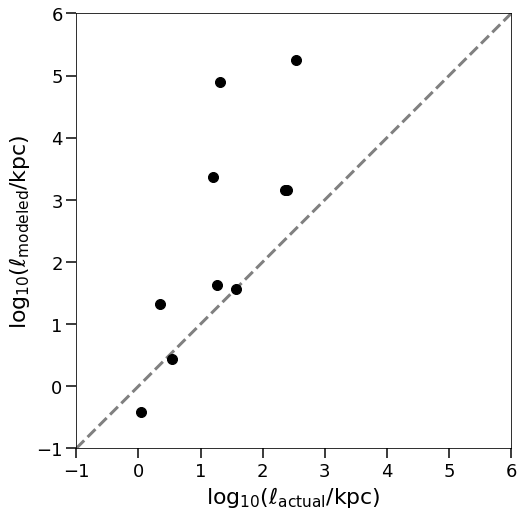

In [21]:
fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

ax.scatter(
    np.log10( actual['length'] ),
    np.log10( modeled['length'] ),
    marker = 'o',
    s = 100,
    color = 'k',
)

# ax.errorbar(
#     np.log10( actual['metallicity'] )[actual_sort_inds],
#     modeled['metallicity'][model_sort_inds],
#     yerr = modeled['emetallicity'][model_sort_inds],
#     marker = 'o',
#     markersize = 10,
#     color = '0.5',
#     linestyle = 'none',
#     zorder = -5,
# )

bounds = [ -1, 6 ]

ax.plot(
    bounds,
    bounds,
    color = '0.5',
    linestyle = '--',
    linewidth = 3,
    zorder = -10,
)

ax.tick_params( length=10, width=1.5, labelsize=18 )

ax.set_xlabel( r'$\log_{10}( \ell_{\rm actual}/{\rm kpc} )$', fontsize=22, )
ax.set_ylabel( r'$\log_{10}( \ell_{\rm modeled}/{\rm kpc} )$', fontsize=22, )

ax.set_xlim( bounds )
ax.set_ylim( bounds )

ax.set_aspect( 'equal' )

plt.savefig( './figures/sample0/l_modeled_vs_actual.pdf', bbox_inches='tight' )

## Sightlines in Context of Priors

### Interpolate to Get PDF Values

In [22]:
dlogT = phase_diagram['logT_edges'][1] - phase_diagram['logT_edges'][0]
dlogHDen = phase_diagram['logH_density_edges'][1] - phase_diagram['logH_density_edges'][0]
pdf = phase_diagram['hist'] / ( dlogT * dlogHDen )

In [23]:
logHDen_centers = phase_diagram['logH_density_edges'][:-1] + 0.5 * dlogHDen
logT_centers = phase_diagram['logT_edges'][:-1] + 0.5 * dlogT

In [24]:
interp_fn = scipy.interpolate.RectBivariateSpline(
    logHDen_centers,
    logT_centers,
    pdf,
)

In [25]:
pdf_values = np.array([ interp_fn( np.log10( actual['H_density'][i] ), np.log10( actual['temperature'][i] ) )[0][0] for i in range( actual['metallicity'].size ) ])

In [26]:
pdf_values[pdf_values<0] = pdf[np.nonzero(pdf)].min()

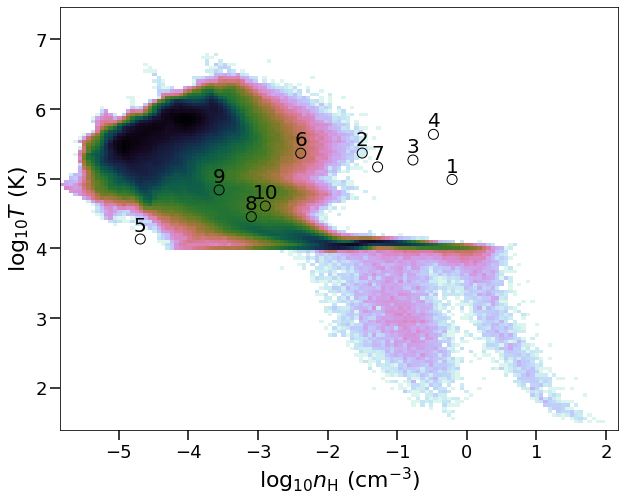

In [27]:
fig = plt.figure( figsize=(10,10), facecolor='w' )
ax = plt.gca()

ax.imshow(
    np.rot90( pdf ),
    extent = [ logHDen_centers[0], logHDen_centers[-1], logT_centers[0], logT_centers[-1] ],
    cmap = palettable.cubehelix.classic_16_r.mpl_colormap,
    norm = matplotlib.colors.LogNorm(),
)

ax.scatter(
    np.log10( actual['H_density'] ),
    np.log10( actual['temperature'] ),
    edgecolor = 'k',
    s = 100,
    c = pdf_values,
    vmin = np.nanmin( pdf[np.nonzero(pdf)] ),
    vmax = np.nanmax( pdf[np.nonzero(pdf)] ),
    cmap = palettable.cubehelix.classic_16_r.mpl_colormap,
    norm = matplotlib.colors.LogNorm(),
)

for i in range( actual['H_density'].size ):
    ax.annotate(
        str( i + 1 ),
        xy = np.log10([ actual['H_density'][i], actual['temperature'][i] ]),
        fontsize = 20,
        color = 'k',
        xytext = ( 0, 3.5 ),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom',
    )

ax.tick_params( length=10, width=1.5, labelsize=18 )

ax.set_xlabel( r'$\log_{10} n_{\rm H}$ (cm$^{-3}$)', fontsize=22 )
ax.set_ylabel( r'$\log_{10} T$ (K)', fontsize=22 )

ax.set_aspect( 'equal' )


## Comparison Including Expected Frequency

In [28]:
y_labels = {
    'metallicity': r'$\log_{10} ( Z_{\rm modeled}/Z_{\rm actual} )$',
    'H_density': r'$\log_{10} ( n_{\rm H, modeled}/n_{\rm H, actual} )$',
    'temperature': r'$\log_{10} ( T_{\rm modeled}/T_{\rm actual} )$',
    'length': r'$\log_{10} (\ell_{\rm modeled} / \ell_{\rm actual} )$',
}

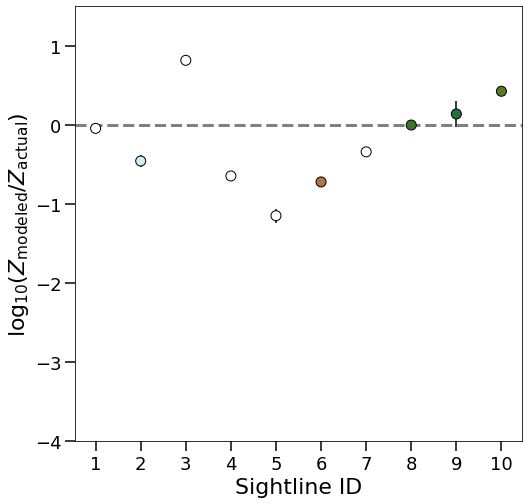

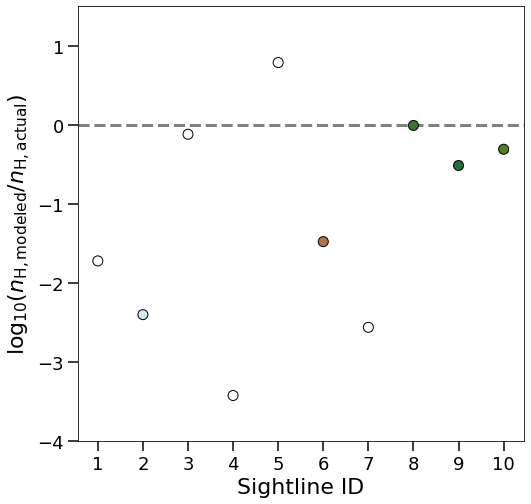

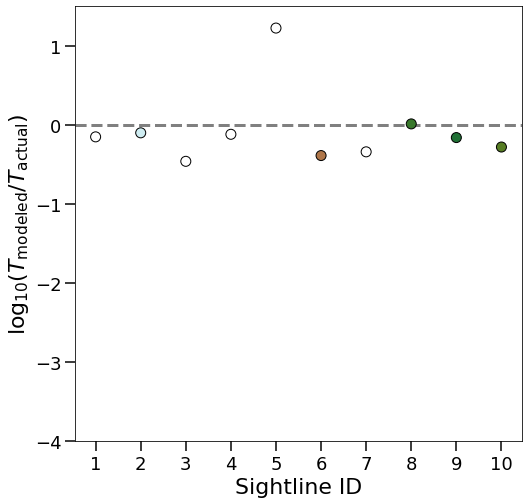

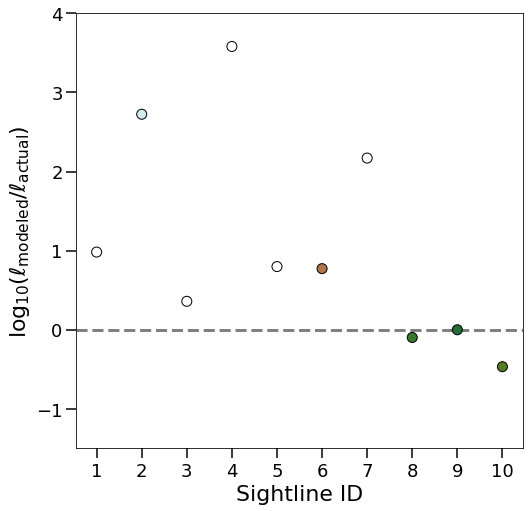

In [29]:
for key in [ 'metallicity', 'H_density', 'temperature', 'length' ]:

    fig = plt.figure( figsize=(8,8), facecolor='w' )
    ax = plt.gca()

    if key != 'length':
        ys = modeled[key] - np.log10( actual[key] )
    else:
        ys = np.log10( modeled[key] / actual[key] )
    ax.scatter(
        np.arange( actual[key].size ) + 1,
        ys,
        edgecolor = 'k',
        s = 100,
        c = pdf_values,
        vmin = np.nanmin( pdf[np.nonzero(pdf)] ),
        vmax = np.nanmax( pdf[np.nonzero(pdf)] ),
        cmap = palettable.cubehelix.classic_16_r.mpl_colormap,
        norm = matplotlib.colors.LogNorm(),
    )

    if key == 'metallicity':
        ax.errorbar(
            np.arange( actual[key].size ) + 1,
            modeled[key] - np.log10( actual[key] ),
            yerr = modeled['emetallicity'],
            linestyle = 'none',
            color = 'k',
            zorder = -10,
        )

    ax.axhline(
        0,
        color = '0.5',
        linestyle = '--',
        linewidth = 3,
        zorder = -10,
    )

    plt.xticks( np.arange( actual['metallicity'].size ) + 1, )
    ax.tick_params( length=10, width=1.5, labelsize=18 )

    ax.set_xlabel( r'Sightline ID', fontsize=22 )
    ax.set_ylabel( y_labels[key], fontsize=22 )
    
    if key != 'length':
        ax.set_ylim( -4, 1.5 )
    else:
        ax.set_ylim( -1.5, 4 )
        
    plt.savefig( './figures/sample0/comparison_{}_inc_freq.pdf'.format( key ), bbox_inches='tight' )

## Compare to sizes, as well as densities and temperature

## Possible Origins of Error

### Mismatch Between Provided and Actual

In [30]:
ions = list( provided.keys() )

<ipython-input-31-18666a60adcd>:5: RuntimeWarning: divide by zero encountered in log10
  xs = np.log10( actual[ion] )


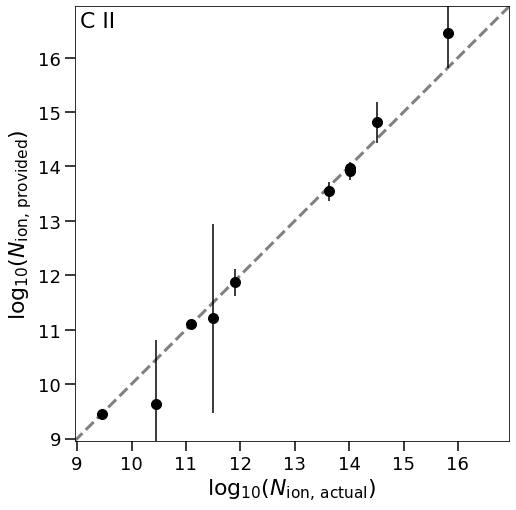

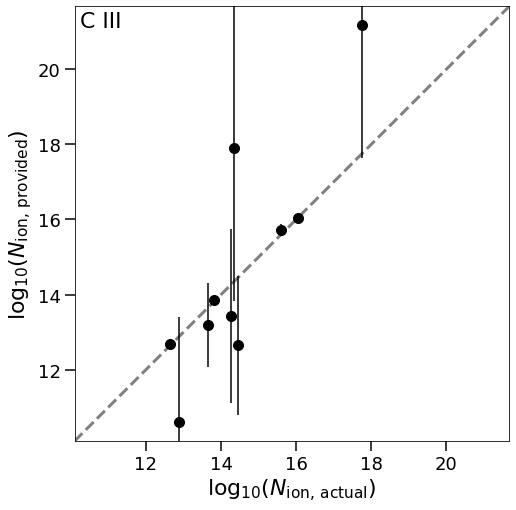

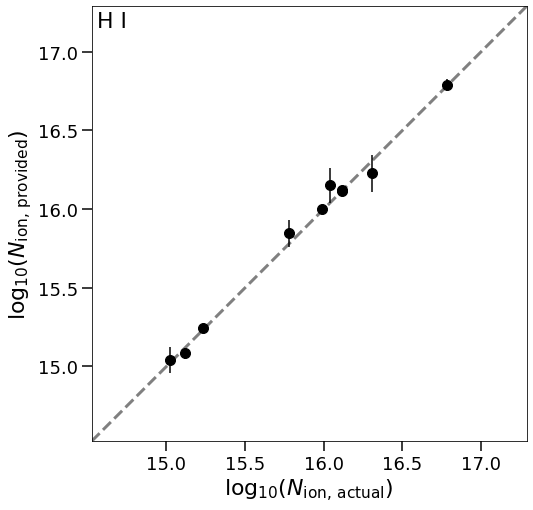

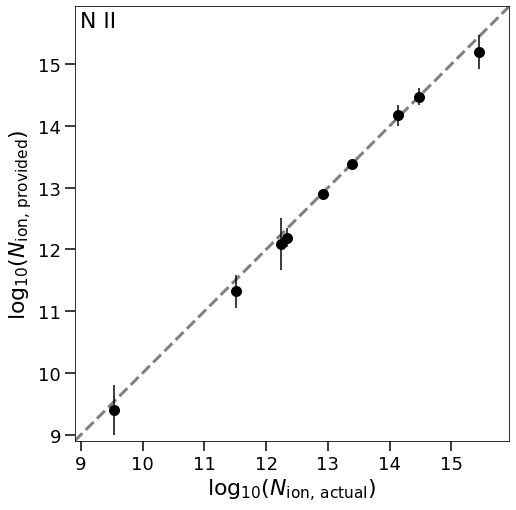

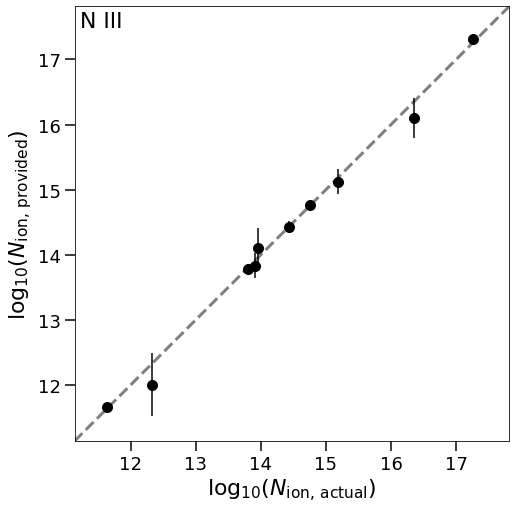

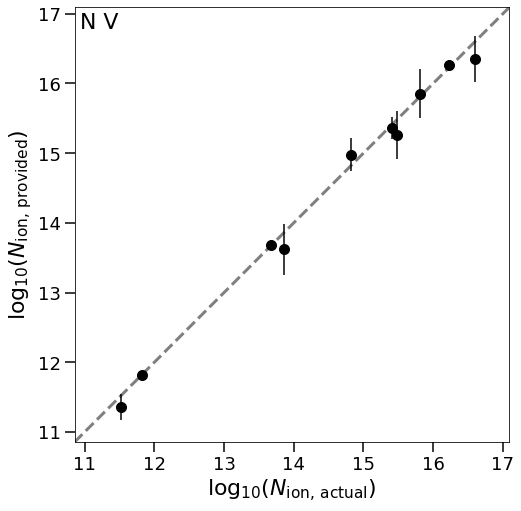

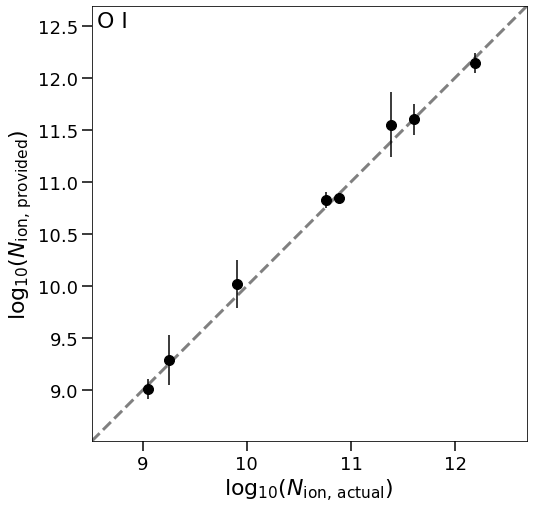

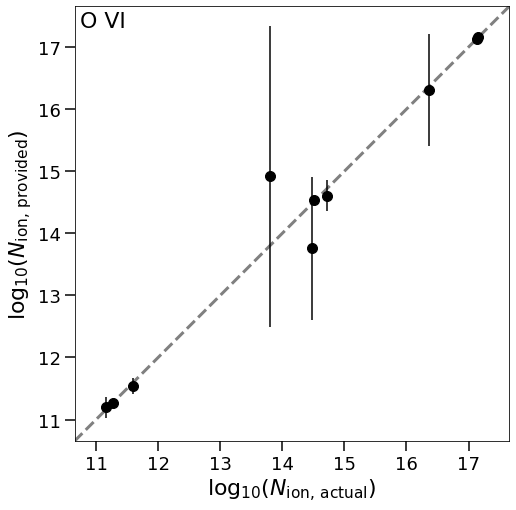

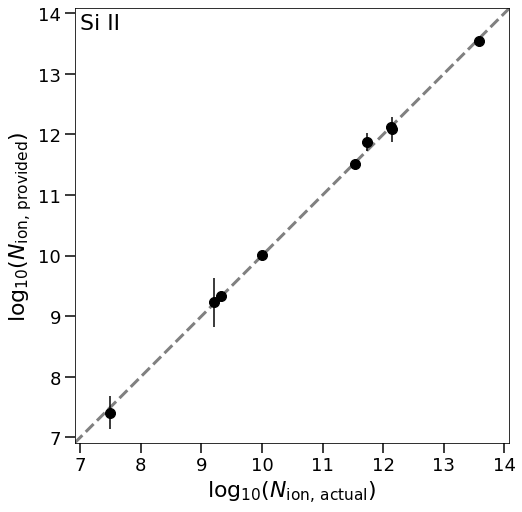

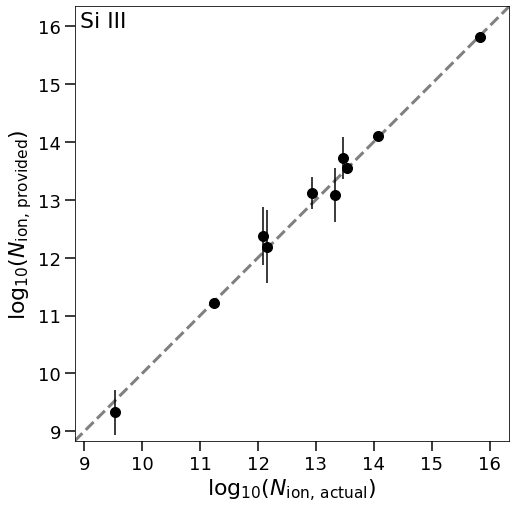

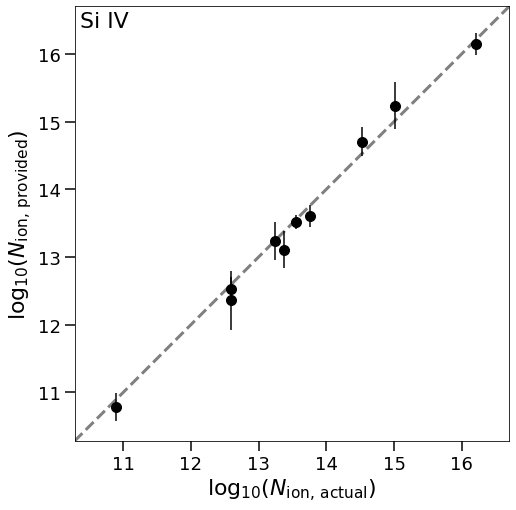

In [31]:

for ion in ions:
    fig = plt.figure( figsize=(8,8), facecolor='w' )
    ax = plt.gca()

    xs = np.log10( actual[ion] )
    ys = provided[ion]['logN']
    eys = provided[ion]['elogN']

    ax.errorbar(
        xs,
        ys,
        yerr = eys,
        marker = 'o',
        markersize = 10,
        color = 'k',
        linestyle = 'none',
    )

    bounds = [
        min( np.nanmin( xs[np.isfinite(xs)] ), np.nanmin( ys[np.isfinite(ys)] ) ) - 0.5,
        max( np.nanmax( xs[np.isfinite(xs)] ), np.nanmax( ys[np.isfinite(ys)] ) ) + 0.5,
    ]
    ax.plot(
        bounds,
        bounds,
        color = '0.5',
        linestyle = '--',
        linewidth = 3,
        zorder = -10,
    )
    
    ax.annotate(
        s = ion,
        xy = ( 0, 1 ),
        xycoords = 'axes fraction',
        xytext = ( 5, -5 ),
        textcoords = 'offset points',
        fontsize = 22,
        ha = 'left',
        va = 'top',
    )
    
    ax.tick_params( length=10, width=1.5, labelsize=18 )

    ax.set_xlabel( r'$\log_{10}( N_{\rm ion,\,actual} )$', fontsize=22, )
    ax.set_ylabel( r'$\log_{10}( N_{\rm ion,\,provided} )$', fontsize=22, )

    ax.set_xlim( bounds )
    ax.set_ylim( bounds )

    ax.set_aspect( 'equal' )